# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")  
jokes_df = pd.read_csv("jokes.csv") 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
cancer_df.drop(['ID'],axis=1,inplace=True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [33]:
cancer_df.shape

(699, 10)

In [6]:
cancer_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [34]:
cancer_df.groupby(["Bare Nuclei"]).count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
Bare Nuclei,,,,,,,,,
1,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8
8,21,21,21,21,21,21,21,21,21


In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [35]:
cancer_df = cancer_df.replace('?', np.nan)
cancer_df = cancer_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [36]:
cancer_df.groupby(["Bare Nuclei"]).count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
Bare Nuclei,,,,,,,,,
1.0,16,16,16,16,16,16,16,16,16
1,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8


In [37]:
cancer_df.head(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [38]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64') 

In [ ]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [39]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [ ]:
#Let us check for pair plots

In [40]:
cancer_df_1 = cancer_df[cancer_df.columns[:-1]]

In [41]:
cancer_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9)
memory usage: 49.2 KB


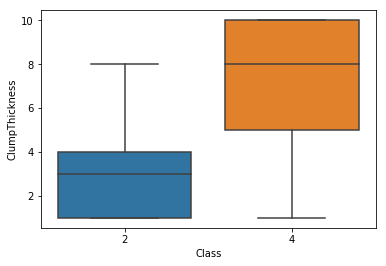

In [47]:
sns.boxplot(x='Class',y='ClumpThickness',data=cancer_df)

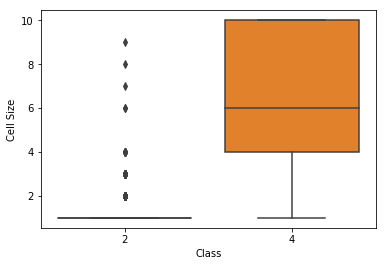

In [48]:
sns.boxplot(x='Class',y='Cell Size',data=cancer_df)

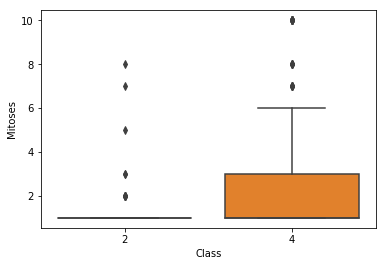

In [49]:
sns.boxplot(x='Class',y='Mitoses',data=cancer_df)

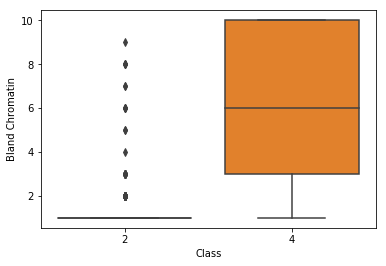

In [51]:
sns.boxplot(x='Class',y='Bland Chromatin',data=cancer_df)

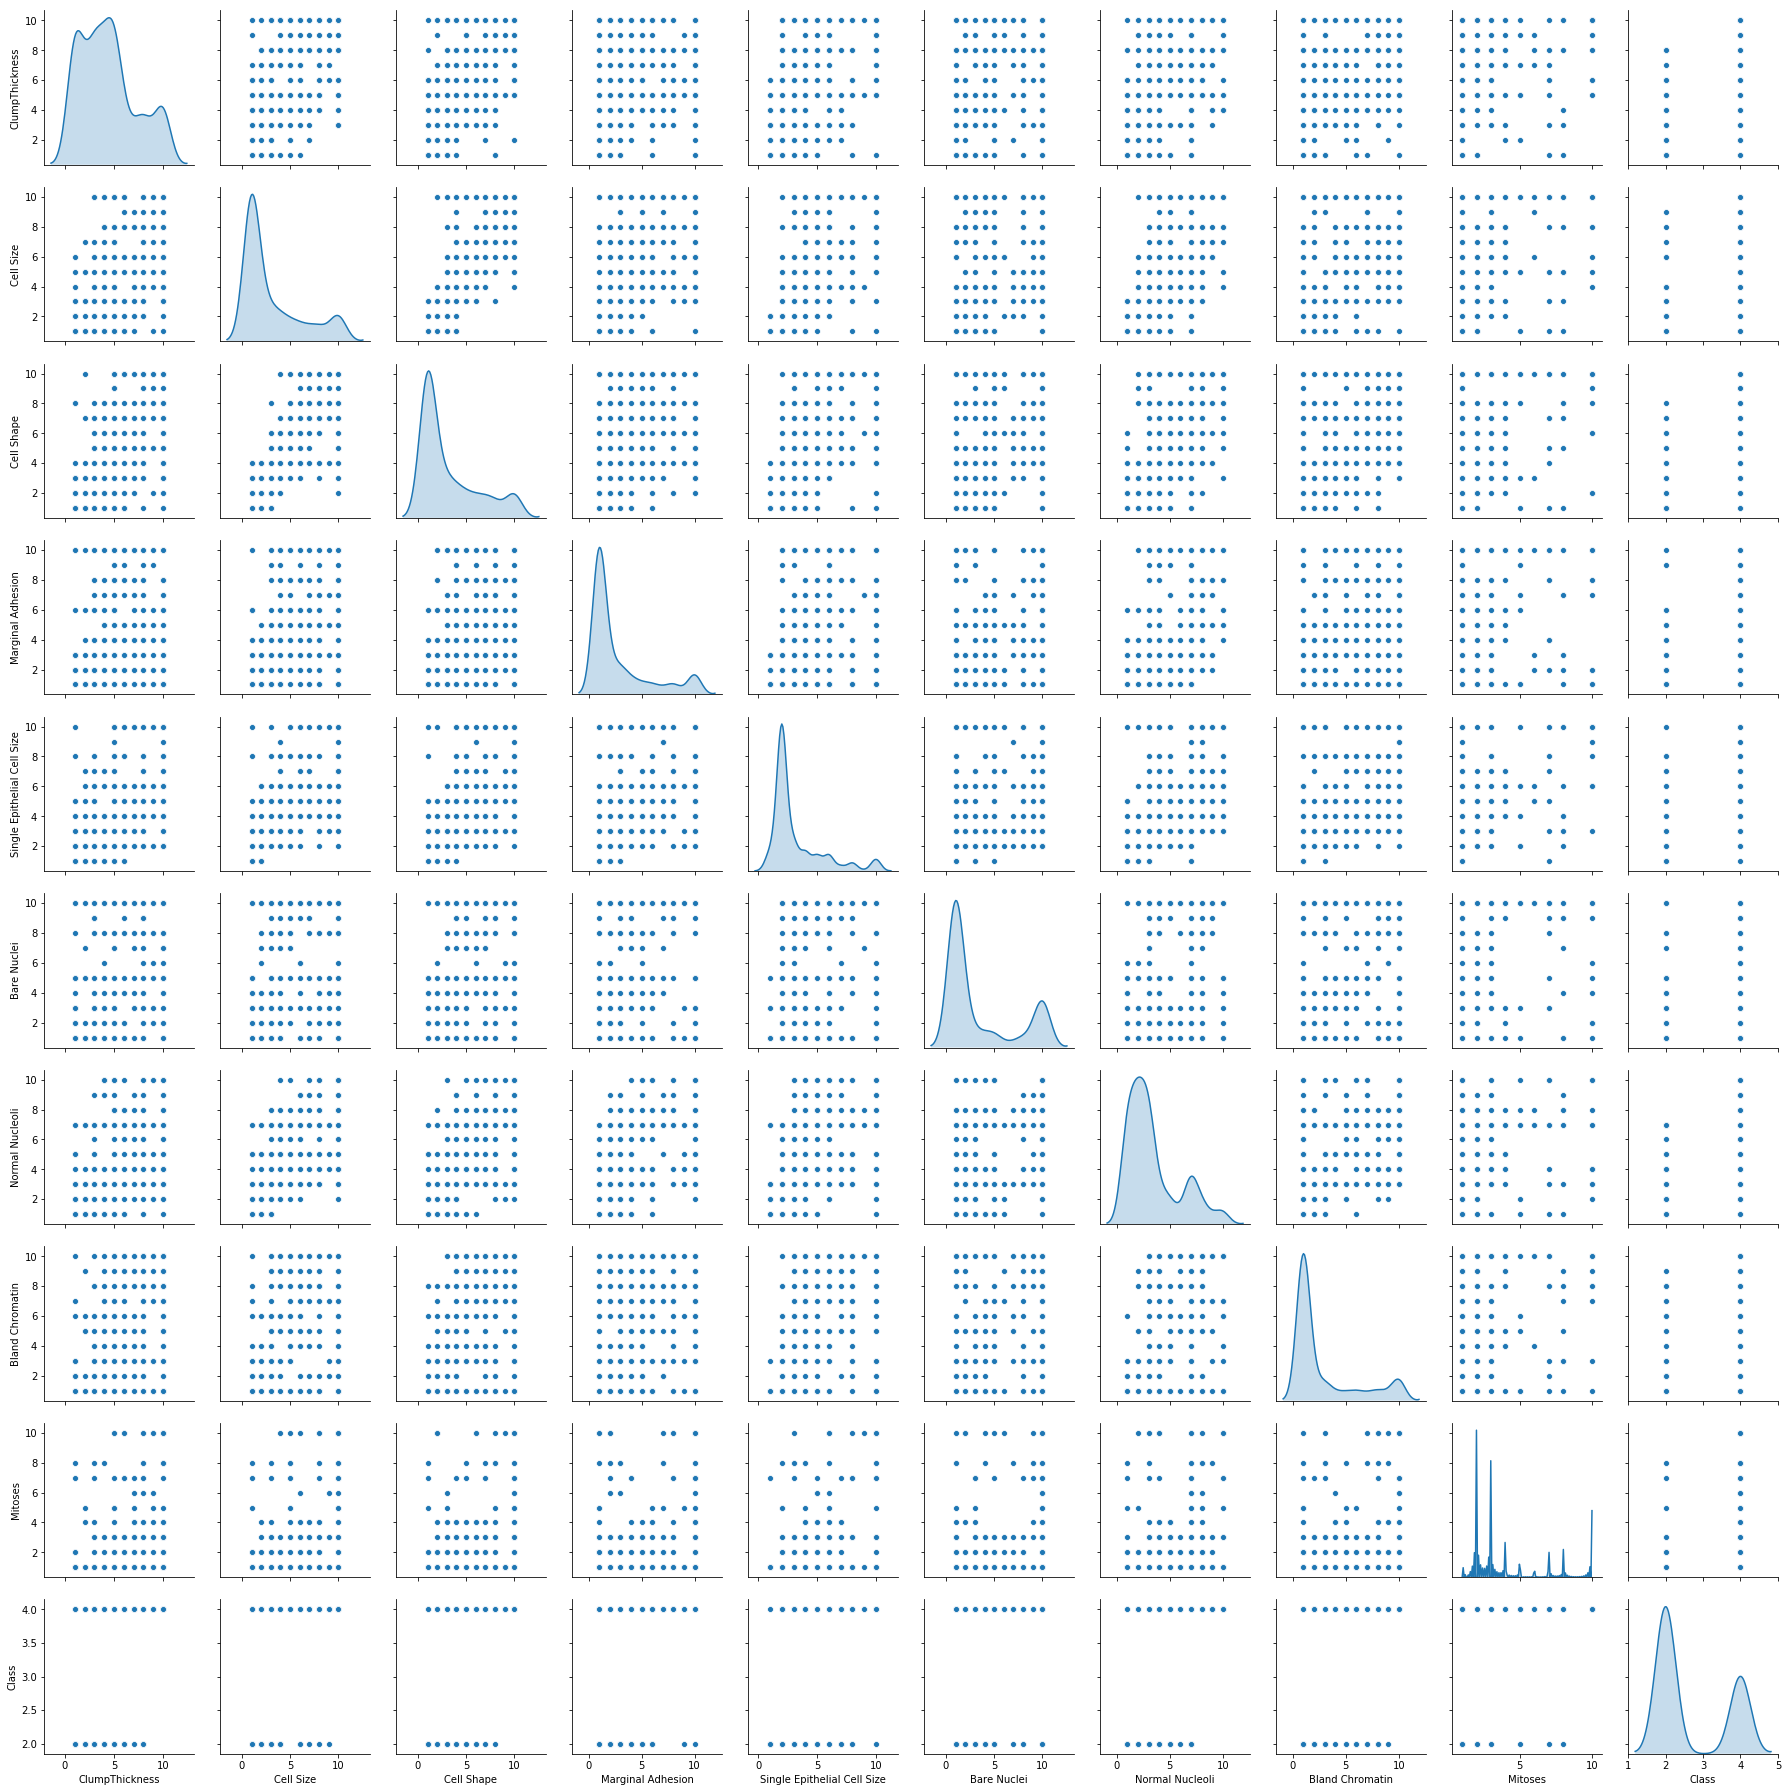

In [62]:
#Multivariant analysis using Pairplot
sns.pairplot(cancer_df, diag_kind='kde')

In [43]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [44]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [55]:
X = cancer_df_1
y = cancer_df["Class"]

In [56]:
X_z = X.apply(zscore)

In [57]:
# We could see most of the outliers are now removed.

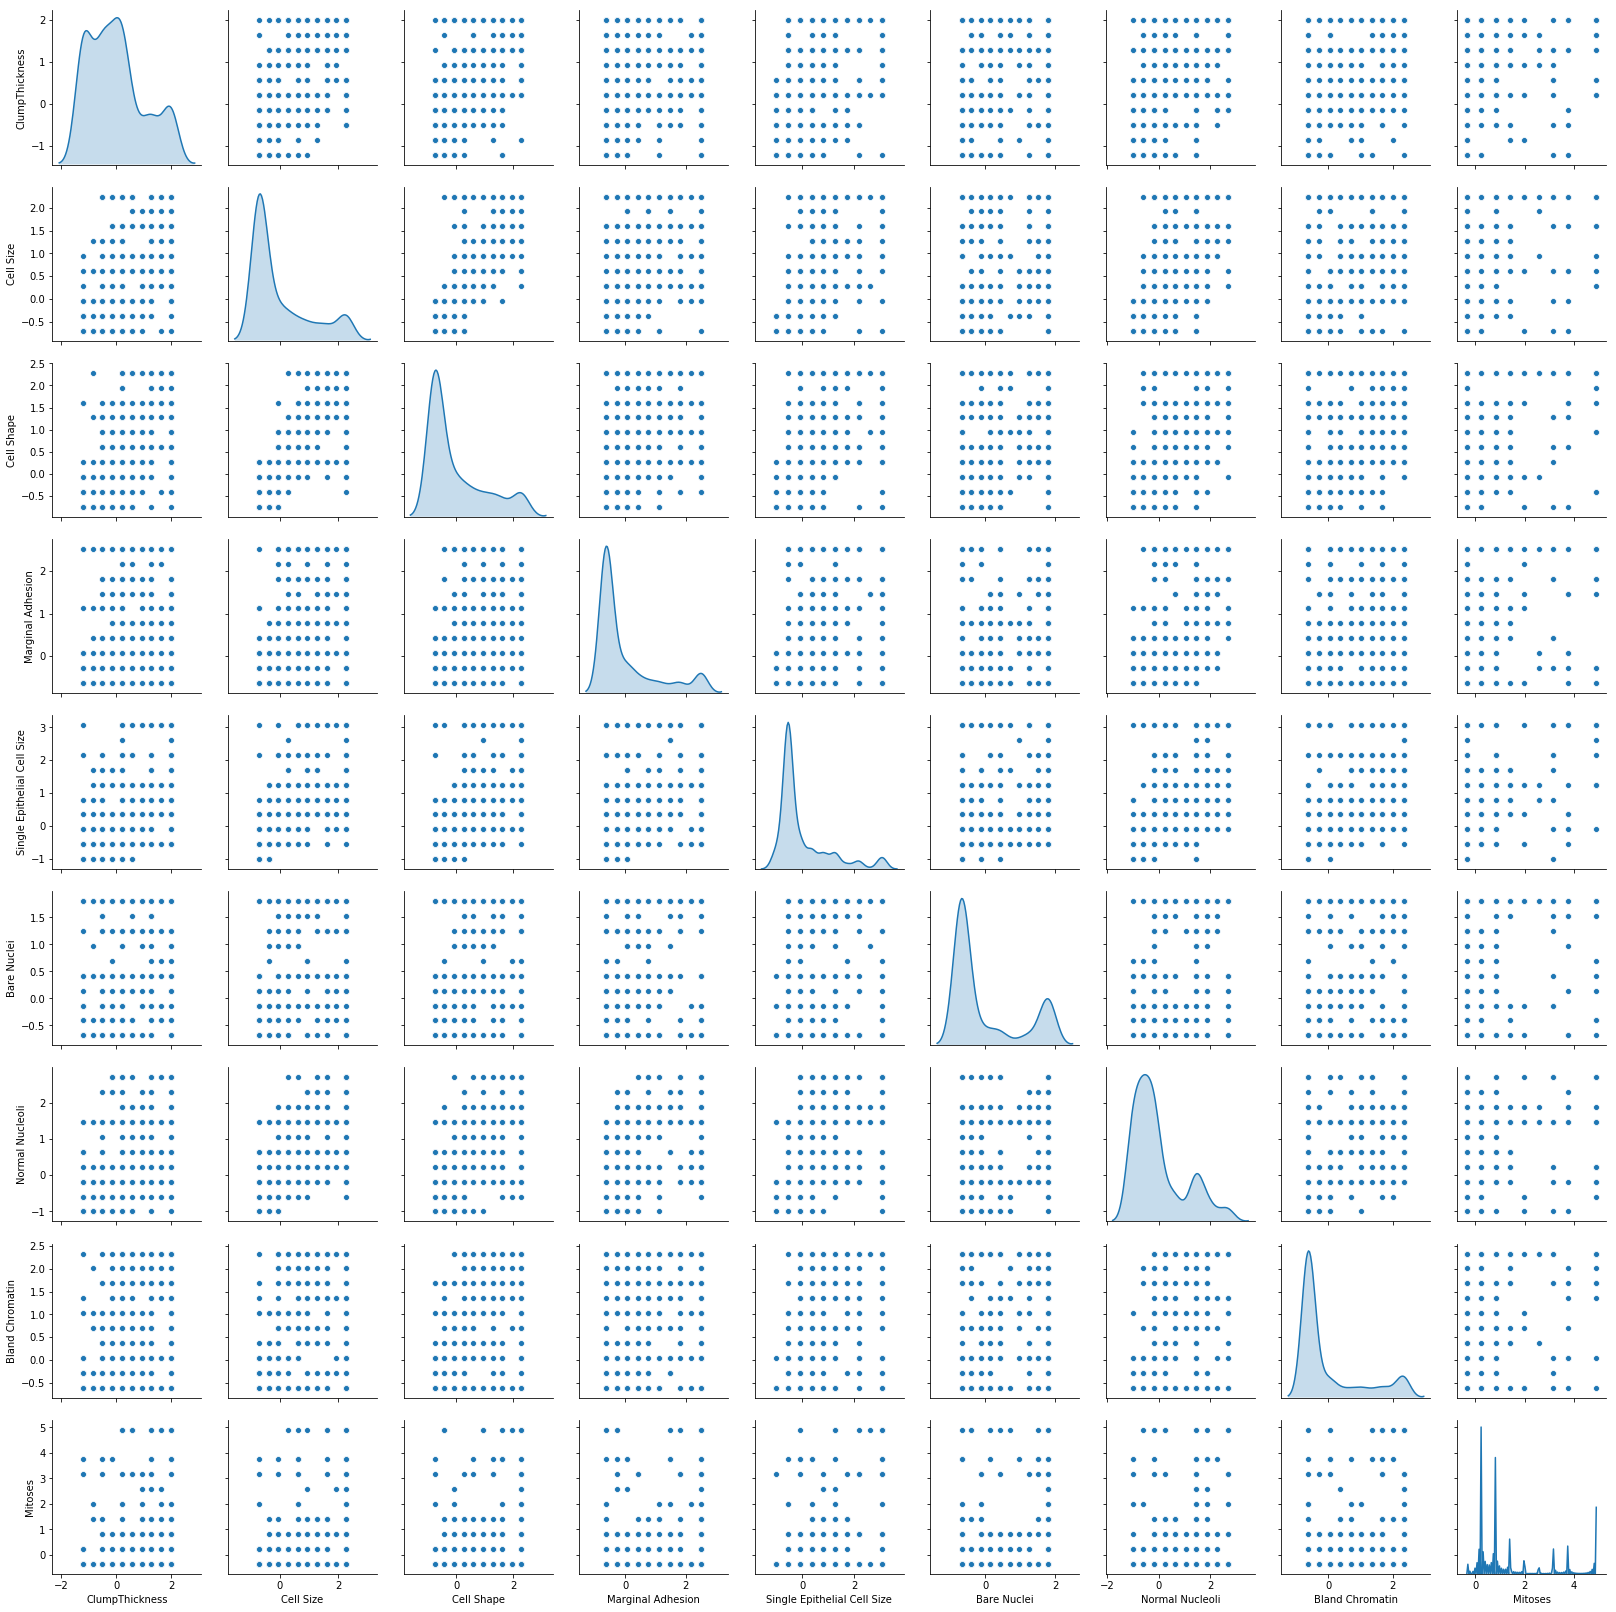

In [61]:
sns.pairplot(X_z, diag_kind='kde')

# Q6 Create a covariance matrix for identifying Principal components

In [58]:
# PCA
# Step 1 - Create covariance matrix


In [59]:
cov_matrix = np.cov(X_z.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [63]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [64]:
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]


print('Eigen values: \n%s' %eigvalues_sort)
print('Eigen vectors: \n%s' %eigvectors_sort)


[(5.898551899582241, array([-0.30280515, -0.38119012, -0.37757351, -0.33282286, -0.33639134,
       -0.33349748, -0.3459564 , -0.33584019, -0.22981766])), (0.7758830680807647, array([ 0.14602888,  0.04956364,  0.08526953,  0.04471887, -0.16403795,
        0.2477099 ,  0.22994199, -0.02502678, -0.90839421])), (0.539601554819918, array([-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
       -0.00367104,  0.19744944,  0.13164974, -0.09459348])), (0.4664055506212335, array([-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
       -0.5431767 , -0.00698988,  0.45537199, -0.23968608])), (0.38101775525038944, array([ 0.07192848, -0.13735749, -0.10469081,  0.03462797, -0.68258246,
       -0.1275059 ,  0.25519148,  0.63180293,  0.1316273 ])), (0.30405591873920346, array([ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
       -0.57486596, -0.31459721, -0.03841564, -0.14360708])), (0.29609473619399845, array([-0.00131277,  0.21521315,  0.14204379, -

In [65]:
tot = sum(eig_vals)
var_explained = [(i / tot) for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_explained)

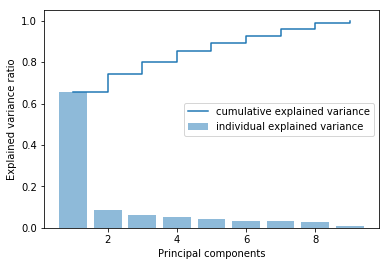

In [66]:
plt.bar(range(1,10),var_explained,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,10),cum_var_exp,where='post',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [67]:
P_reduce = np.array(eig_vecs[0:10])
X_std_8D = np.dot(X_z,P_reduce.T)
proj_data_df = pd.DataFrame(X_std_8D)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(proj_data_df, y, test_size=0.30, random_state=1)


# Q10 Find correlation between components and features

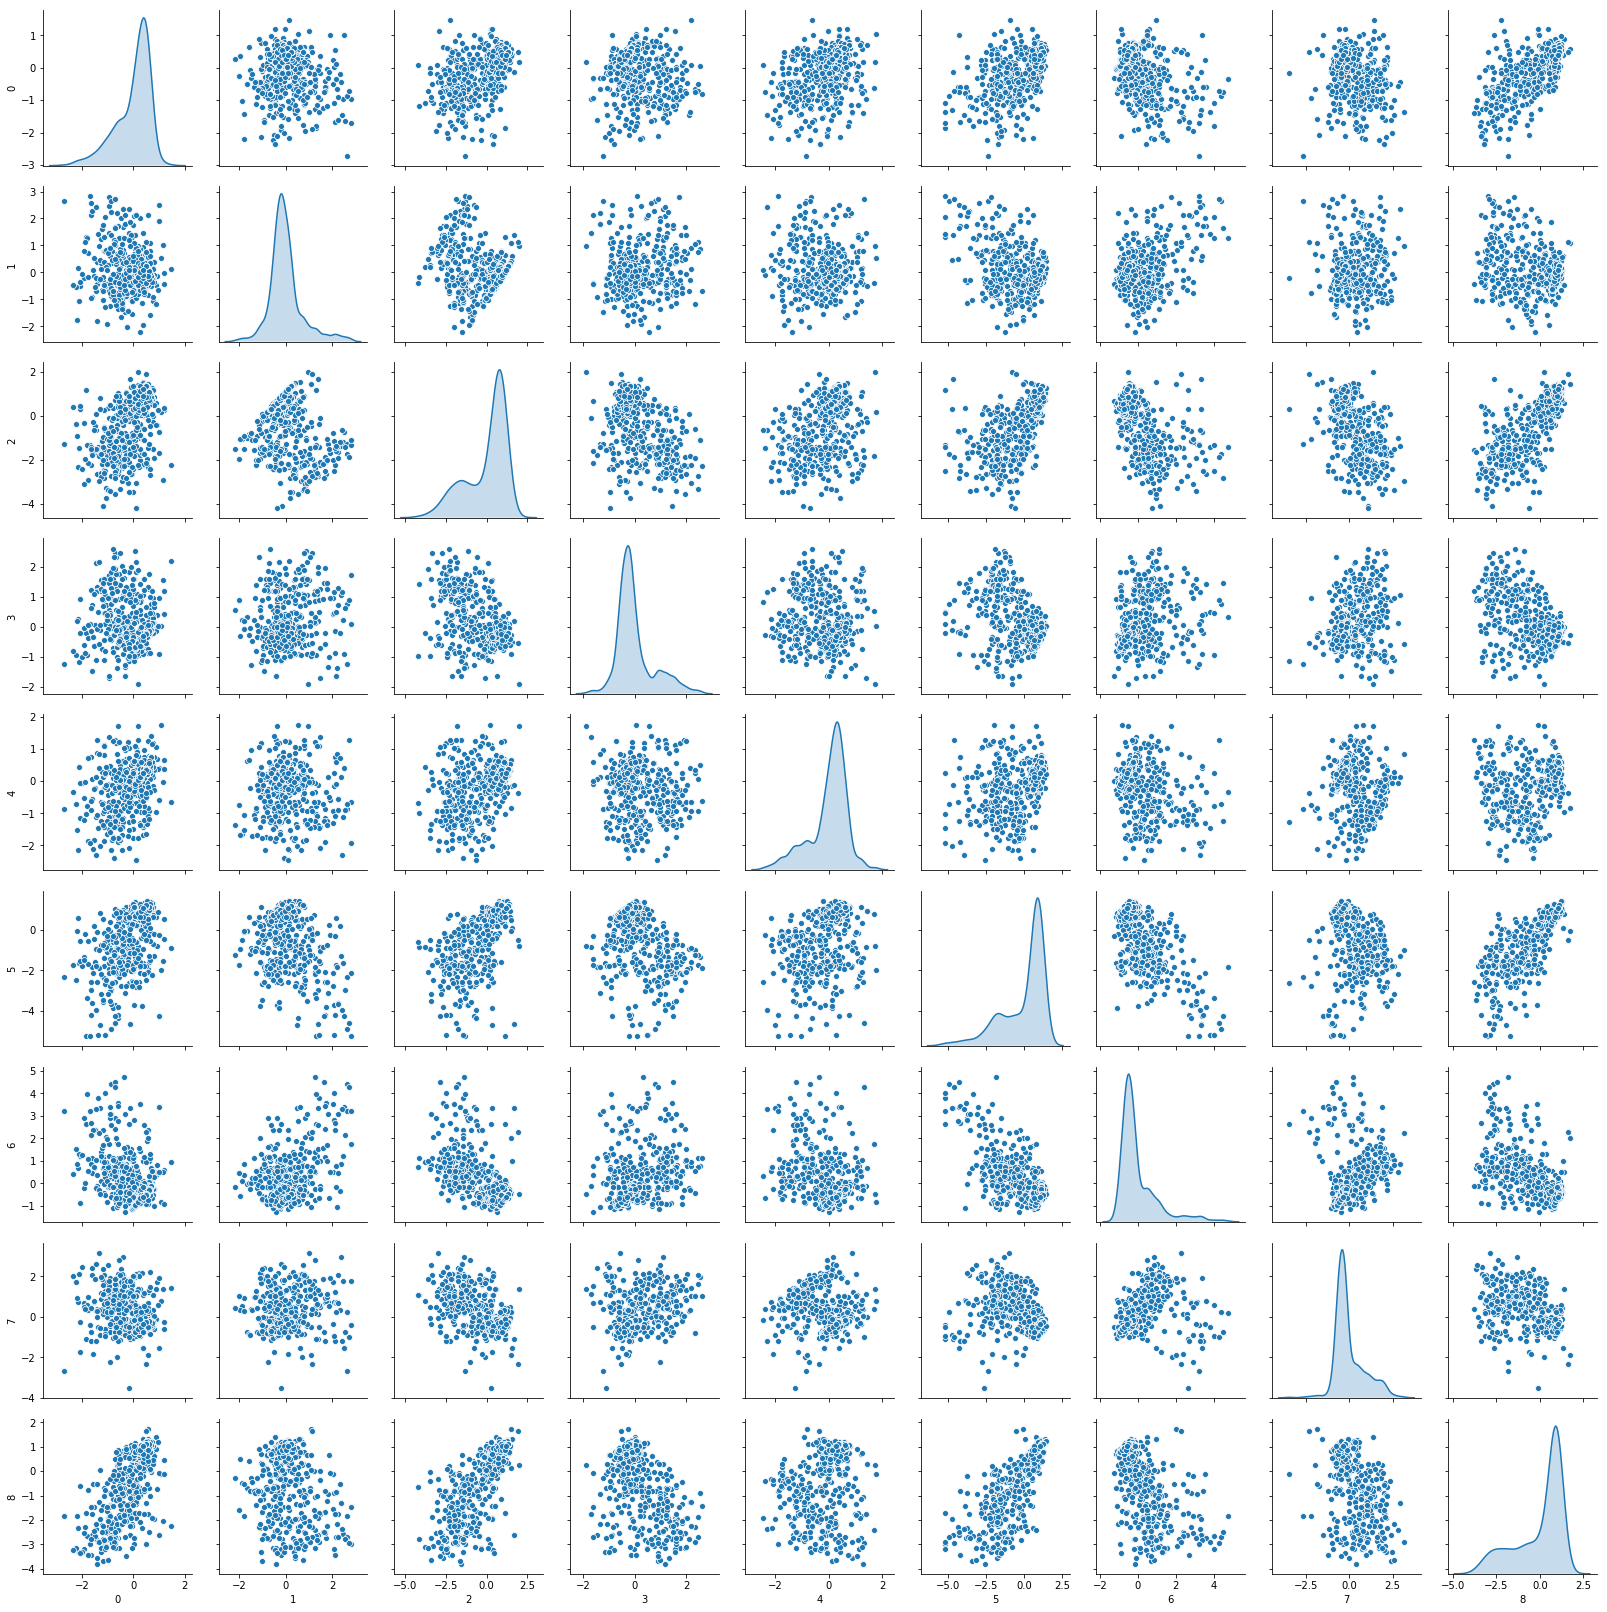

In [69]:
sns.pairplot(proj_data_df, diag_kind='kde')

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [70]:
movies_df = pd.read_csv("movies_metadata.csv") 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [7]:
jokes_data = pd.read_csv("jokes.csv")

In [8]:
jokes_data.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [9]:
jokes_data.shape

(24983, 101)

In [10]:
jokes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [11]:
jokes_data_df = jokes_data.sample(200)

In [12]:
jokes_data_df.shape

(200, 101)

# Q22 Change the column indices from 0 to 99

In [13]:
jokes_data_df.drop(['Joke100'],axis=1).head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99
13496,58,99.00,99.00,99.00,99.00,7.82,2.72,-5.10,-5.19,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00
10959,50,99.00,99.00,99.00,99.00,-5.92,-7.82,-7.38,-7.52,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
14555,80,0.19,-3.06,-0.49,-4.08,2.48,0.53,-3.54,0.63,-3.50,...,0.58,99.00,99.00,1.50,0.58,-3.06,-2.43,1.60,2.62,-7.52
7315,100,1.65,2.18,4.71,6.60,-7.67,0.97,7.48,-7.48,-1.12,...,6.55,6.75,6.02,4.76,7.48,6.94,4.42,4.71,6.26,3.79
12407,65,-6.60,-7.86,-0.39,99.00,2.43,0.87,5.58,-6.89,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,0.83,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [23]:
jokes_data_df.replace(99.00,0,inplace=True)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [24]:
sc = StandardScaler()
ratings_diff =  sc.fit_transform(jokes_data_df)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [25]:
jokes_data_df.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
13496,58,0.00,0.00,0.00,0.00,7.82,2.72,-5.10,-5.19,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.82,0.00,0.00,0.00
10959,50,0.00,0.00,0.00,0.00,-5.92,-7.82,-7.38,-7.52,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14555,80,0.19,-3.06,-0.49,-4.08,2.48,0.53,-3.54,0.63,-3.50,...,0.00,0.00,1.50,0.58,-3.06,-2.43,1.60,2.62,-7.52,6.07
7315,100,1.65,2.18,4.71,6.60,-7.67,0.97,7.48,-7.48,-1.12,...,6.75,6.02,4.76,7.48,6.94,4.42,4.71,6.26,3.79,1.94
12407,65,-6.60,-7.86,-0.39,0.00,2.43,0.87,5.58,-6.89,0.00,...,0.00,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00,0.00


In [26]:
jokes_data_df.groupby(by='NumJokes')['Joke1'].mean().sort_values(ascending=False).head(10)

NumJokes
69    7.430000
85    5.390000
70    5.045000
74    4.823333
68    4.470000
83    4.030000
95    3.830000
84    3.590000
89    3.500000
71    3.058889
Name: Joke1, dtype: float64

In [27]:
jokes_data_df.groupby(by='NumJokes')['Joke2'].mean().sort_values(ascending=False).head(10)

NumJokes
89    8.980000
85    8.350000
84    8.250000
68    6.600000
69    5.870000
50    4.270000
60    3.570000
66    3.425000
59    3.073333
57    2.140000
Name: Joke2, dtype: float64

In [31]:
jokes_data_df.mean().sort_values(ascending=False).head(10)

NumJokes    70.17000
Joke36       3.29610
Joke50       3.14875
Joke62       3.04615
Joke27       2.96570
Joke32       2.78135
Joke54       2.72680
Joke29       2.50420
Joke35       2.50130
Joke66       2.45915
dtype: float64

Thus we see that Joke36 has the highest mean value.